Creating large scale routing data from different distributions


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from lib.problem import RPGenerator
import matplotlib.pyplot as plt

In [3]:
# global
PROBLEM = "CVRP"

TRN_SEED = 111
VAL_SEED = 222
TST_SEED = 333
TRN_SIZE = 1000
VAL_SIZE = 100
TST_SIZE = 100
SEEDS = [TRN_SEED, VAL_SEED, TST_SEED]
SIZES = [TRN_SIZE, VAL_SIZE, TST_SIZE]
# 5000/480/50
GRAPH_SIZES =   [50, 100, 200, 500, 1000, 2000, 4000]
NUM_V =         [16, 32,  48,  64,  128,  240,  480]
CAPACITY =      [40, 50,  50,  50,  50,   50,   50]


In [3]:
# UNIFORM instances
# uniform coords, random int demand, fixed cap

# specific sampling args
COORDS = "uniform"
WEIGHTS = "random_int"

# save paths
trn_name = f"data_train_seed{TRN_SEED}_size{TRN_SIZE}_{COORDS}_{WEIGHTS}.dat"
val_name = f"data_val_seed{VAL_SEED}_size{VAL_SIZE}_{COORDS}_{WEIGHTS}.dat"
tst_name = f"data_test_seed{TST_SEED}_size{TST_SIZE}_{COORDS}_{WEIGHTS}.dat"


def get_generator(seed: int):
    return RPGenerator(
        seed=seed,
        verbose=True,
        coords_sampling_dist=COORDS,
        weights_sampling_dist=WEIGHTS,
    )

In [4]:
skip = 6

for i, g_size, k, cap in zip(range(len(GRAPH_SIZES)), GRAPH_SIZES, NUM_V, CAPACITY):
    if i >= skip:
        save_pth = f"./data/{PROBLEM}/{PROBLEM.lower()}{g_size}"

        for j, seed, size, fname in zip(range(len(SIZES)), SEEDS, SIZES, [trn_name, val_name, tst_name]):
            if g_size >= 1000 and j == 0:
                # dont create training data for large problems
                continue
            gen = get_generator(seed)
            val_data = gen.generate(problem=PROBLEM, sample_size=size, graph_size=g_size, k=k, cap=cap)
            gen.save_dataset(val_data, filepath=save_pth, fname=fname)



Sampling 100 problems with graph of size 4000+1.
Sampling 100 problems with graph of size 4000+1.


/mnt/_data/PycharmProjects/neural_ruin_recreate/lib/problem/generator.py:695: UserWarning: no 'max_cap_factor' for sampling provided. Using default 1.15.
  warn(f"no 'max_cap_factor' for sampling provided. Using default 1.15.")


In [4]:
# MIXED instances
# uniform + gm coords,
# demands uniform but normalized by different variable k

# specific sampling args
COORDS = "mixed"
WEIGHTS = "random_k_variant"
MU = "normal"
MU_P = (0, 1)
SIGMA = "uniform"
SIGMA_P = (0.05, 0.1)
NC = (1, 10)
FRAC_P = (0.5, 9)

# save paths
trn_name = f"data_train_seed{TRN_SEED}_size{TRN_SIZE}_{COORDS}_{WEIGHTS}.dat"
val_name = f"data_val_seed{VAL_SEED}_size{VAL_SIZE}_{COORDS}_{WEIGHTS}.dat"
tst_name = f"data_test_seed{TST_SEED}_size{TST_SIZE}_{COORDS}_{WEIGHTS}.dat"


def get_generator(seed: int):
    return RPGenerator(
        seed=seed,
        verbose=True,
        coords_sampling_dist=COORDS,
        weights_sampling_dist=WEIGHTS,
        mu_sampling_dist=MU,
        mu_sampling_params=MU_P,
        sigma_sampling_dist=SIGMA,
        sigma_sampling_params=SIGMA_P,
        n_components=NC,
        uniform_fraction=FRAC_P
    )


In [6]:
skip = 6

for i, g_size, k, cap in zip(range(len(GRAPH_SIZES)), GRAPH_SIZES, NUM_V, CAPACITY):
    if i >= skip:
        save_pth = f"./data/{PROBLEM}/{PROBLEM.lower()}{g_size}"

        for j, seed, size, fname in zip(range(len(SIZES)), SEEDS, SIZES, [trn_name, val_name, tst_name]):
            if g_size >= 1000 and j == 0:
                # dont create training data for large problems
                continue
            gen = get_generator(seed)
            val_data = gen.generate(problem=PROBLEM, sample_size=size, graph_size=g_size, k=k, cap=cap)
            gen.save_dataset(val_data, filepath=save_pth, fname=fname)



Sampling 100 problems with graph of size 4000+1.
Sampling 100 problems with graph of size 4000+1.


In [19]:
gen = get_generator(1)
lpth = "data/CVRP/cvrp200/data_val_seed222_size100_uniform_random_int.dat"
dat = gen.load_dataset(lpth, limit=5)
dat[0]


RPInstance( coords=ndarray_[201, 2],  demands=ndarray_[201],  graph_size=201,  depot_idx=[0],  vehicle_capacity=1.0,  max_num_vehicles=None,  time_windows=None)

In [13]:
i = 4
n = GRAPH_SIZES[i]
k = NUM_V[i]
cap = CAPACITY[i]
PLOT_HIST = False


In [14]:
gen = RPGenerator(
seed=VAL_SEED, verbose=True,
coords_sampling_dist="mixed",
weights_sampling_dist="random_k_variant",
mu_sampling_dist="normal",
n_components=(1, 10),
sigma_sampling_params=(0.05, 0.1),
uniform_fraction=(0.5, 9), #(0.0, 0.45),
                   )

In [15]:
data = gen.generate(problem=PROBLEM, sample_size=30, graph_size=n, k=k, cap=cap)

Sampling 30 problems with graph of size 1000+1.


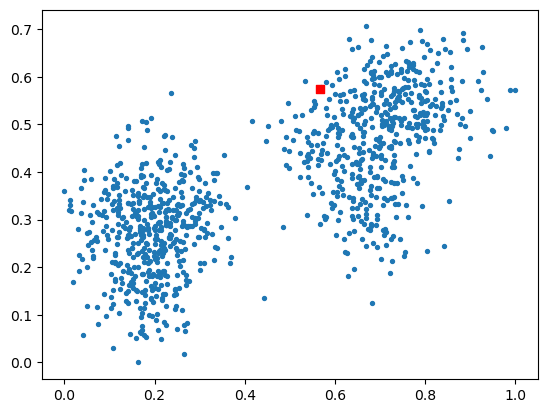

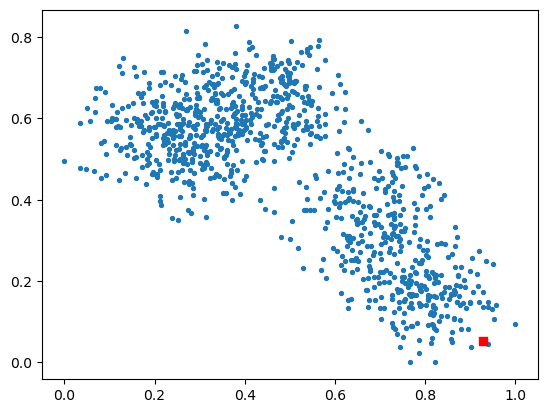

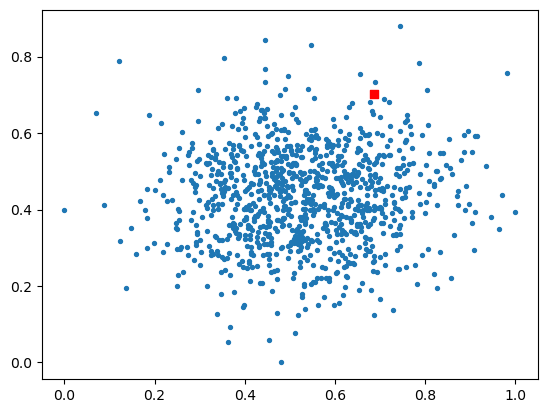

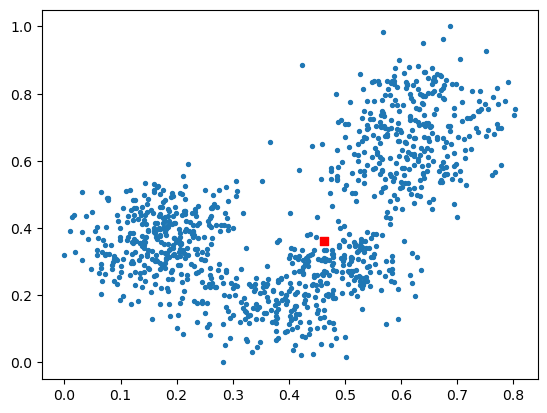

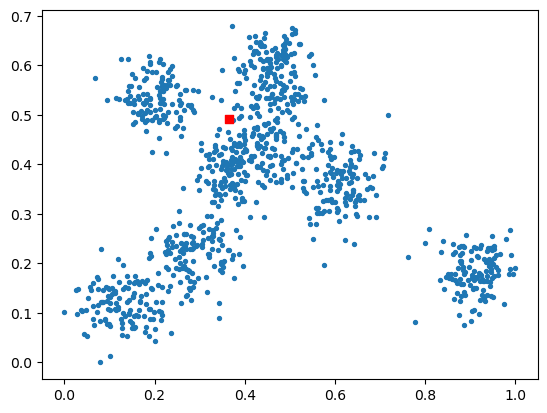

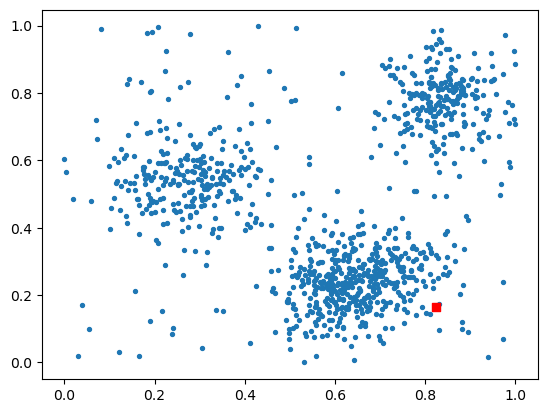

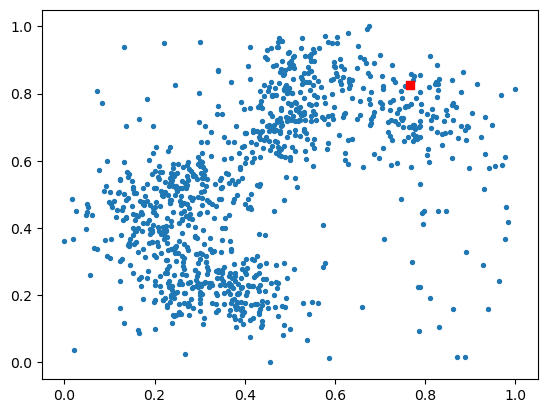

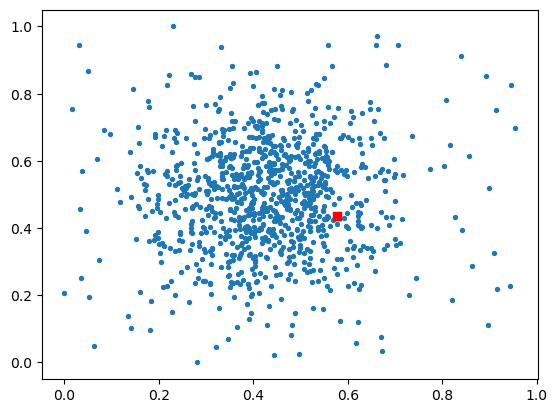

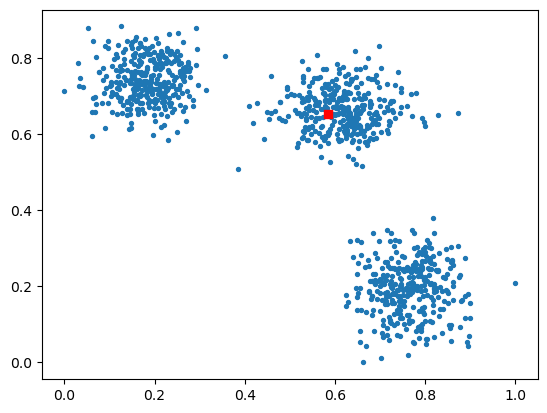

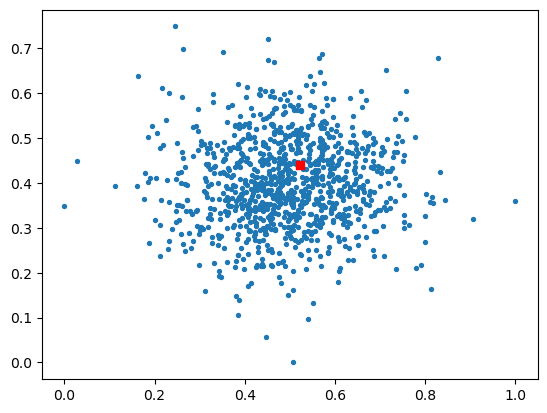

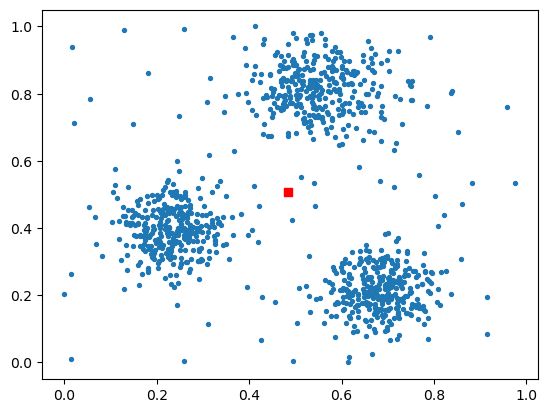

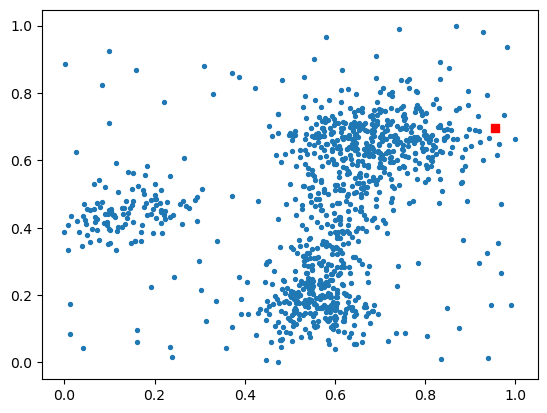

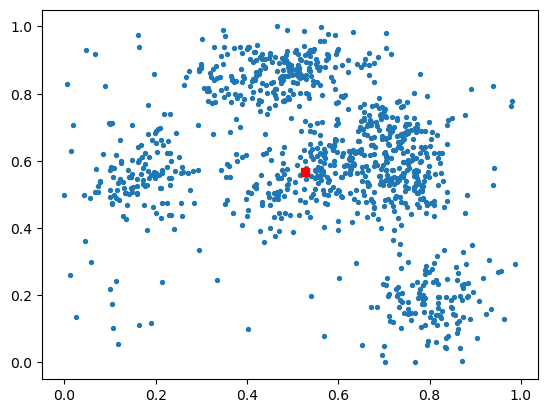

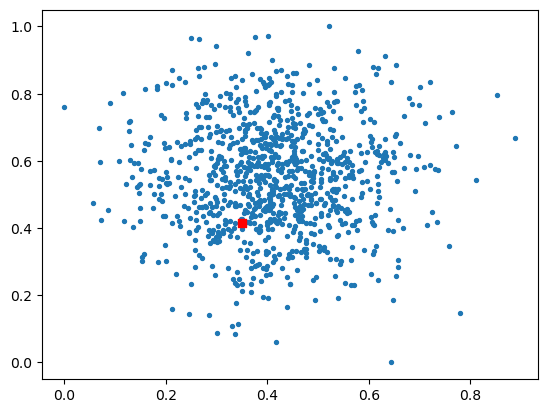

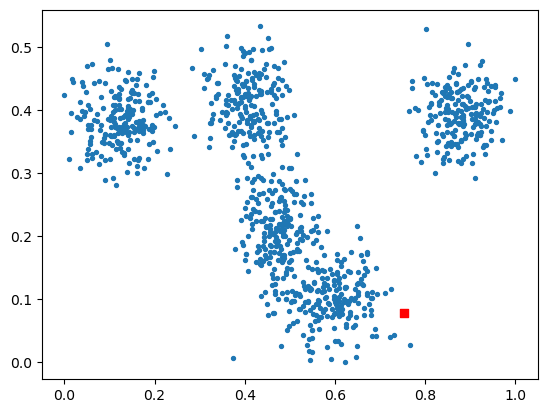

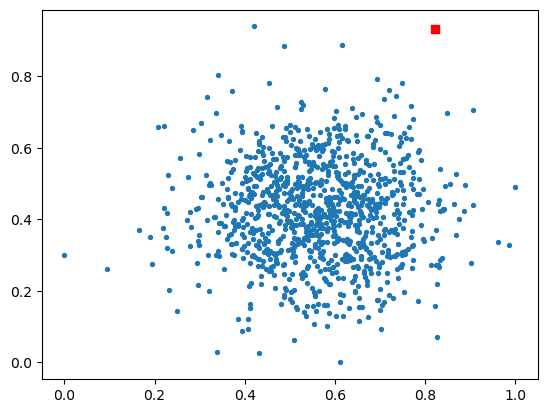

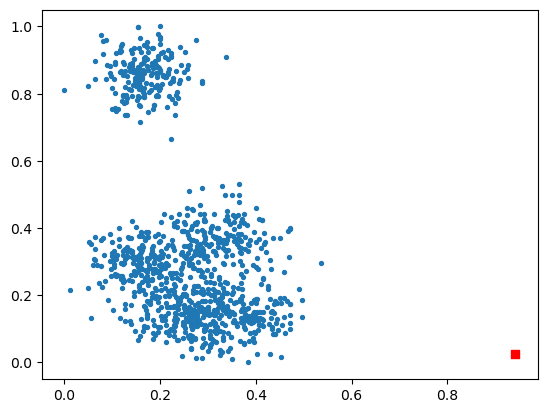

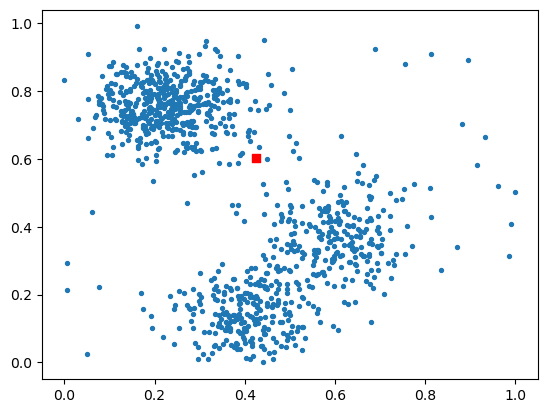

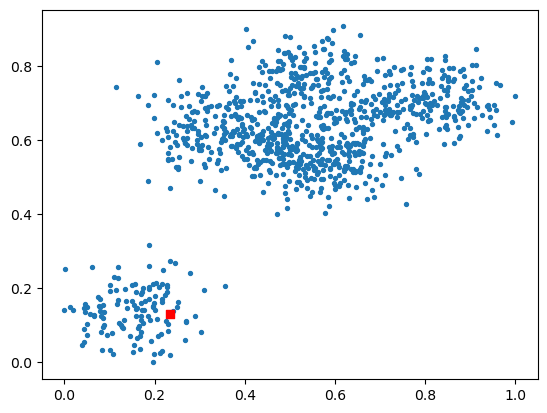

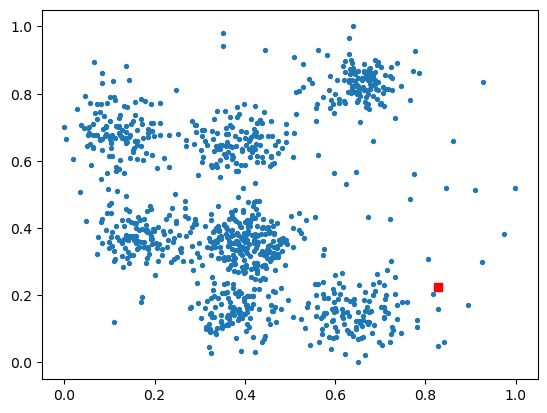

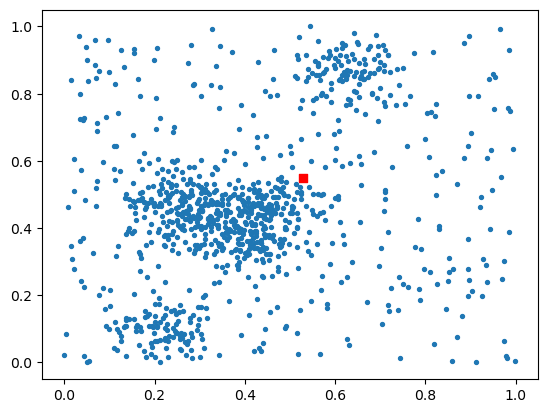

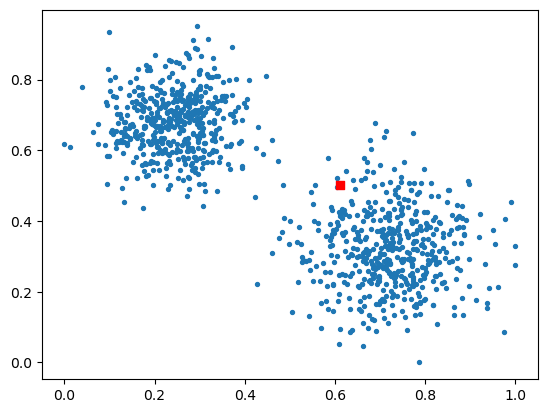

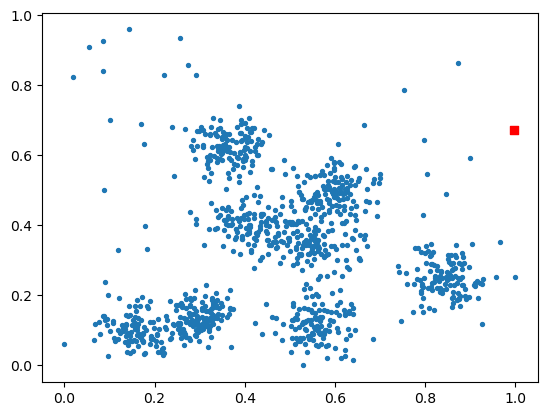

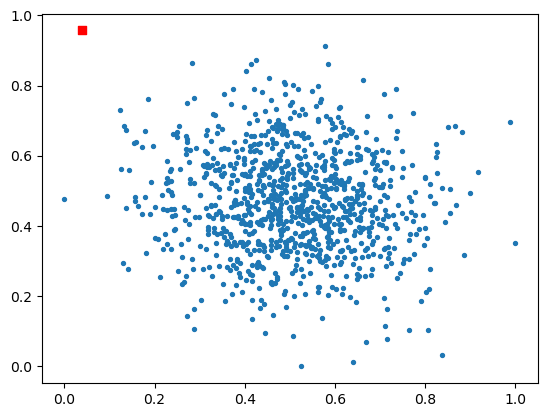

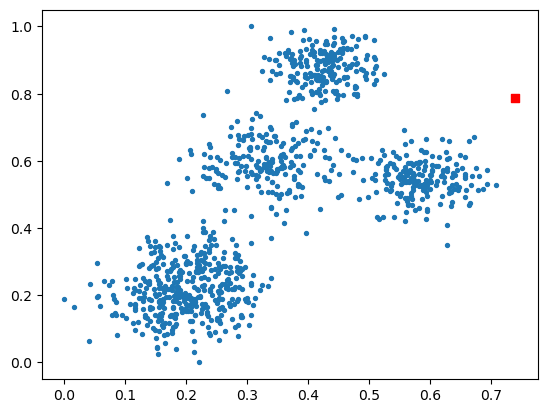

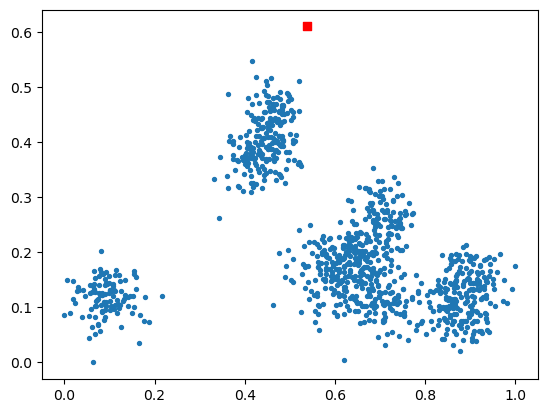

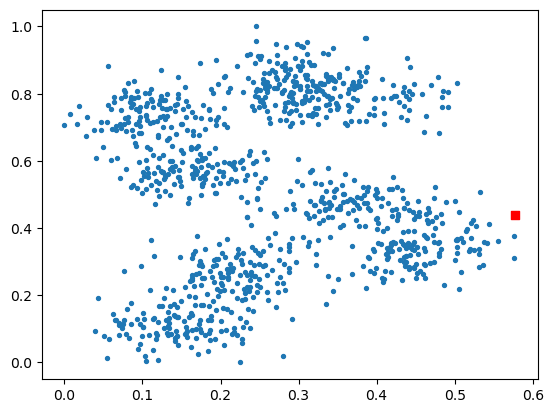

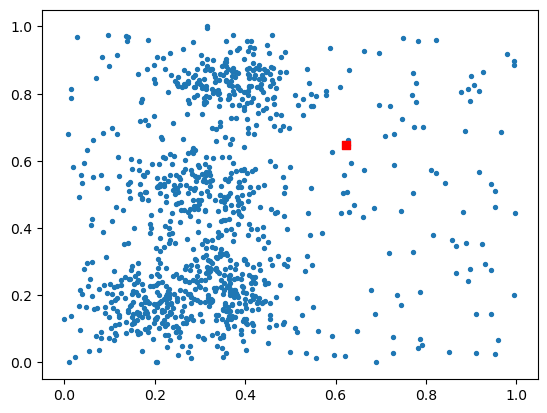

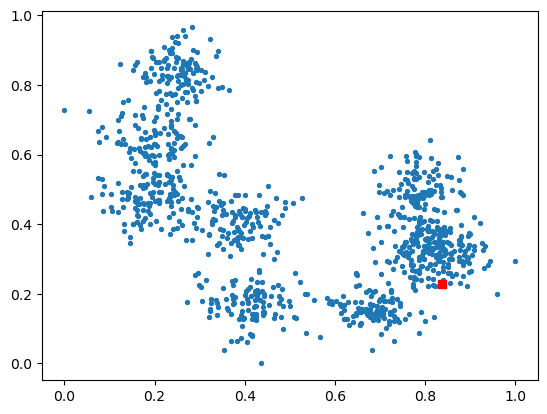

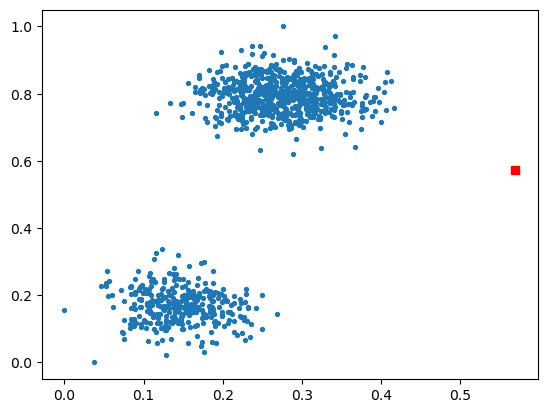

In [16]:
for d in data:

    plt.scatter(d.coords[1:, 0], d.coords[1:, 1], s=8)
    plt.scatter(d.coords[0, 0], d.coords[0, 1], c="red", marker="s")
    plt.show()
    if PLOT_HIST:
        plt.hist(d.node_features[:, -1], density=True)
        plt.show()